Data File : Graduates.csv




In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()

In [2]:
#buat data acak
rng = np.random.RandomState(0)
#urutan numerik
x = np.linspace(0, 10, 500)
#cumulative u/menhitung array pada sb tertentu
y = np.cumsum(rng.randn(500, 6), 0)

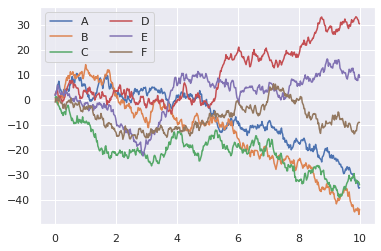

In [ ]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

# **Exploring with Seaboarn**


In [ ]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])



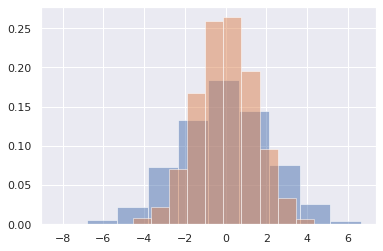

In [ ]:
for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

Menggunakan distribusi kernel density estimation ``sns.kdeplot``

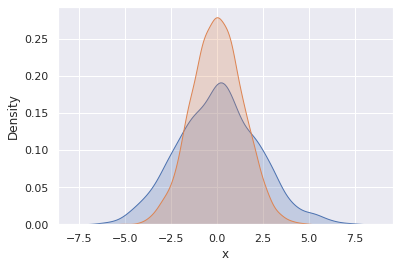

In [ ]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


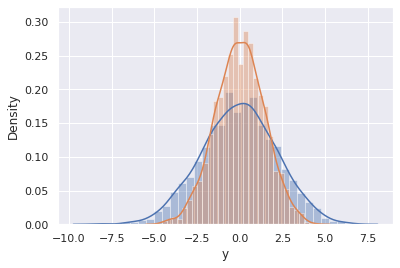

In [ ]:
#combined histogram dan KDE menggunaka distplot
sns.distplot(data['x'])
sns.distplot(data['y']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


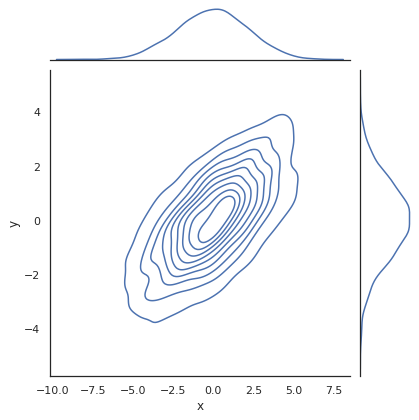

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


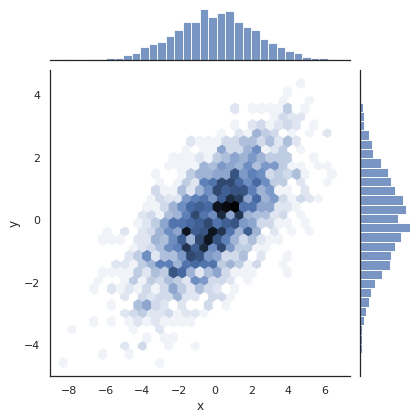

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

# **Pair Plot**
digunakan untuk menjelajahi korelasi antara data multidimensi, ingin memplot semua pasangan nilai satu sama lain. kali ini menggunakan dataset iris dan mencantumkan pengukuran kelopak dan sepal dari tiga spesies iris

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Memvisualisasikan hubungan multidimensi di antara sampel `sns.pairplot`


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


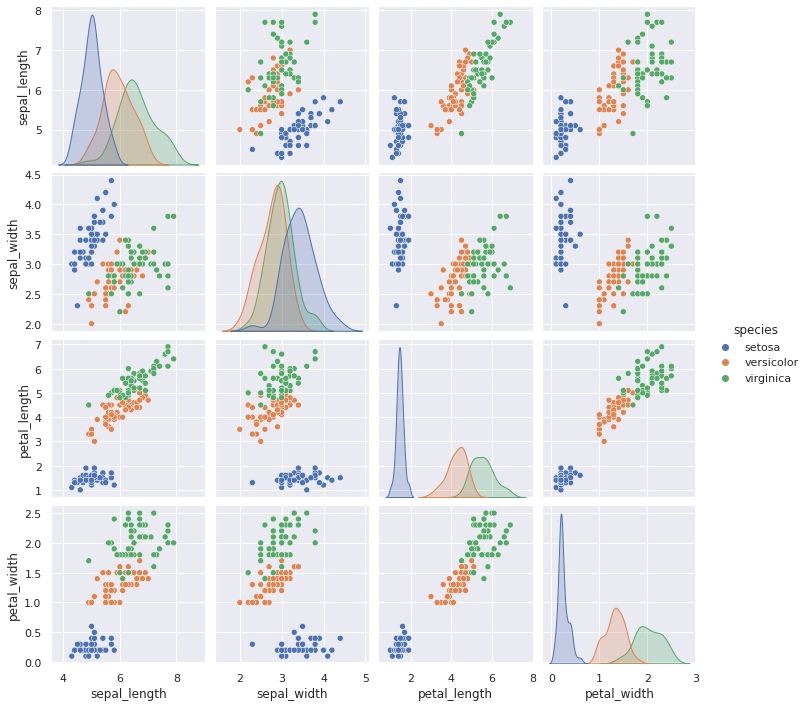

In [ ]:
sns.pairplot(iris, hue='species', size=2.5);

# **Faceted Histogram**

Mevisualisasikan data tips dengan **facetting histogram**  
 [Seaborn faceted histogram](https://seaborn.pydata.org/examples/faceted_histogram.html)



In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


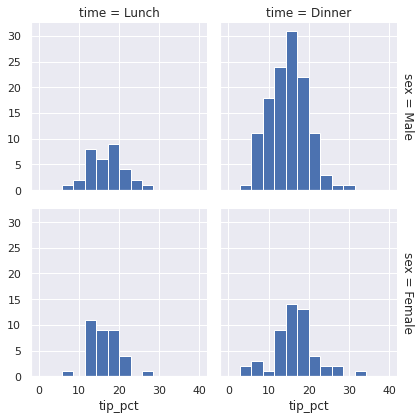

In [ ]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

# Factor plot
ini juga dapat melihat distribusi parameter dalam bin

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


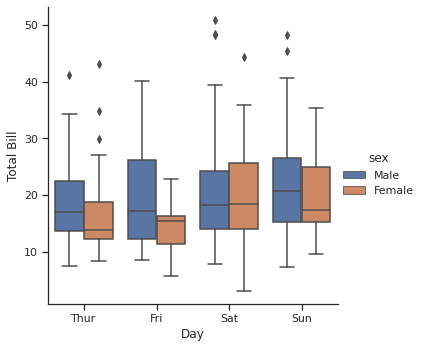

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

# Joint distribution
sama dengan pair plot namun kita dapat menggunakan `sns.jointplot` untuk menunjukkan distribusi gabungan antara kumpulan data yang berbeda, bersama dengan distribusi marginal yang terkait:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


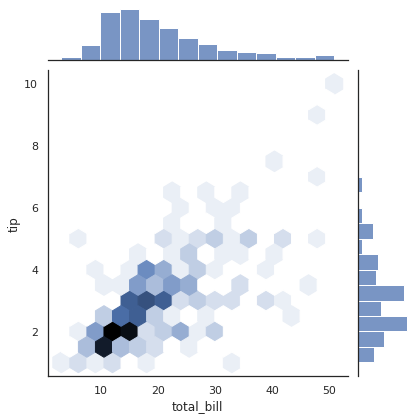

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

Viualisation Regression Model


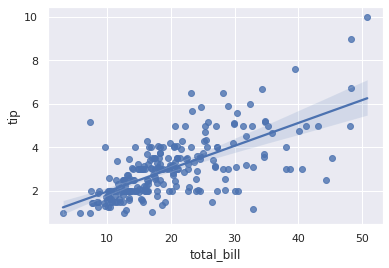

In [ ]:
sns.regplot(x="total_bill", y="tip", data=tips);

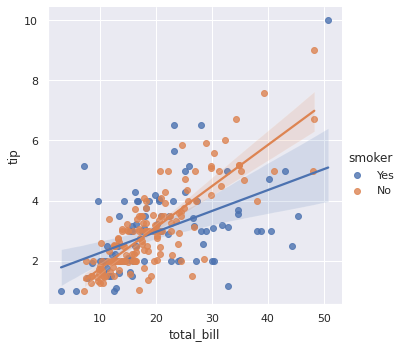

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);